# Malicious Url Prediction Using Machine Learning 

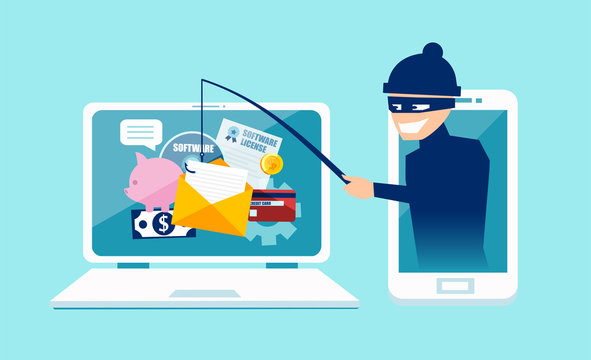

## **Import Package**

In [ ]:
! pip install nltk sklearn pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


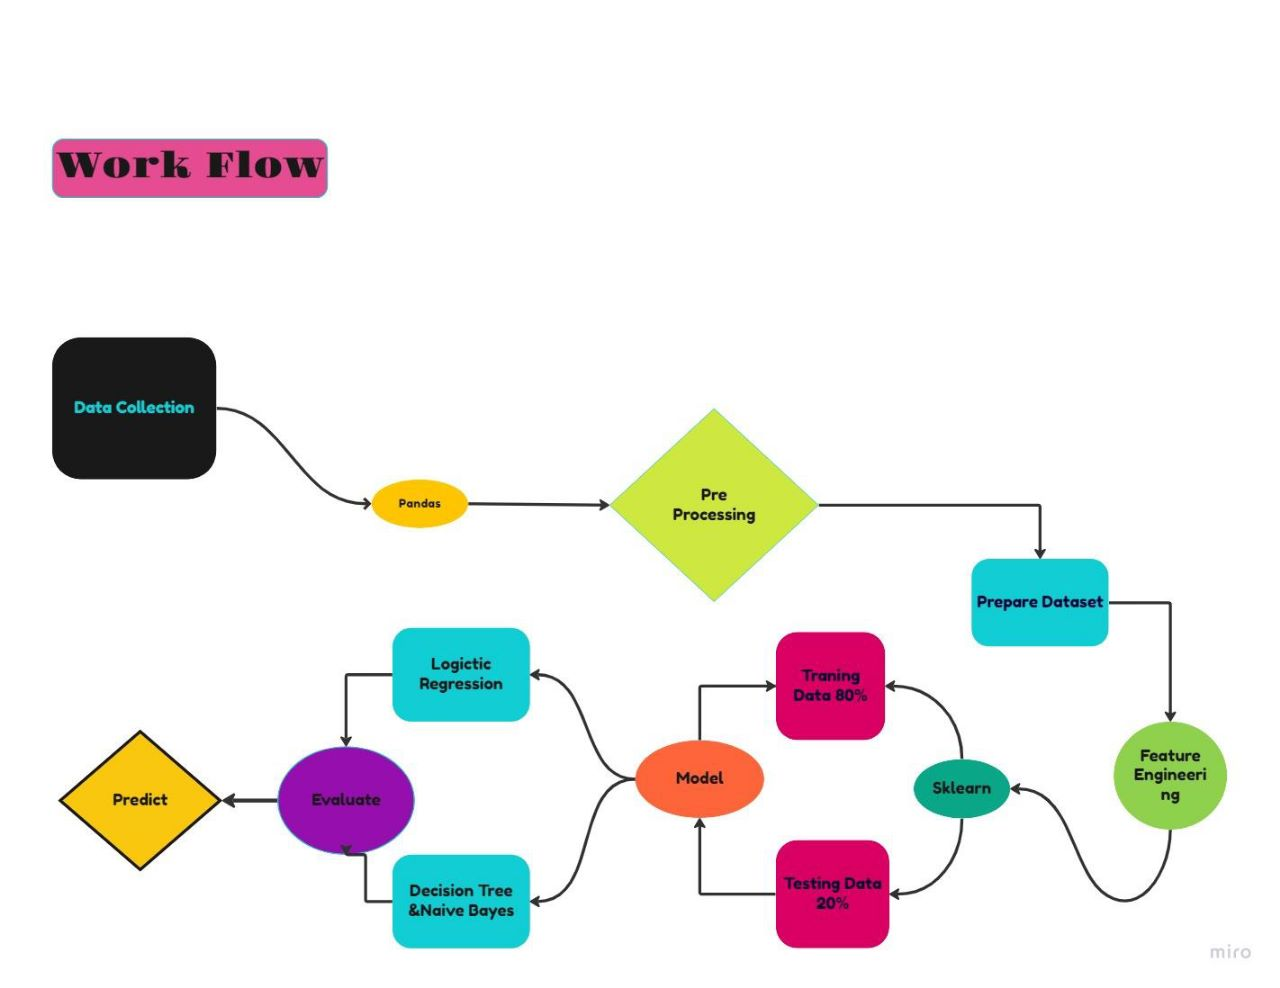

## Import Data set

In [ ]:
data = pd.read_csv("D:\\mal-new\\Malcious_url.csv")

In [ ]:
data.head()

,URLs,Class
0,freebase.com/view/en/bob_sirois,good
1,en.wikipedia.org/wiki/Joie_Lee,good
2,pipl.com/directory/people/Rejean/Beaudin,good
3,flickr.com/photos/teneyck/sets/72157610336209297/,good
4,ussoccer.com/News/Federation-Services/2009/06/...,good


In [ ]:
data.shape

(453434, 2)

## Spilt

In [ ]:
# Perform Train/Test split
test_percentage = .2
test_url = data['URLs'][4]
train_df, test_df = train_test_split(data, test_size=test_percentage, random_state=42)

labels = train_df['Class']
test_labels = test_df['Class']


- Counting Splits -
Training Samples: 362747
Testing Samples: 90687


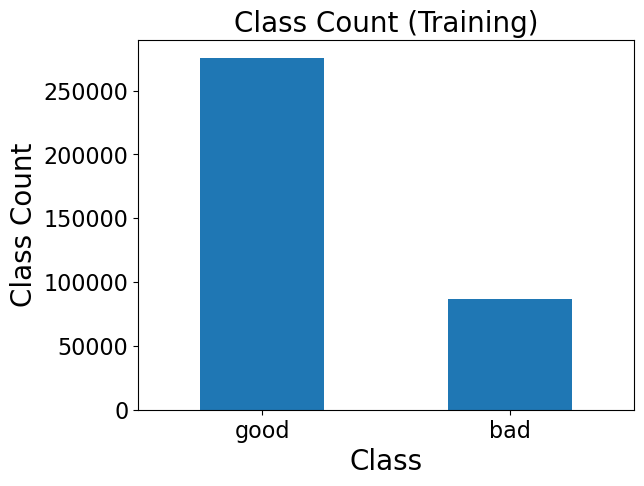

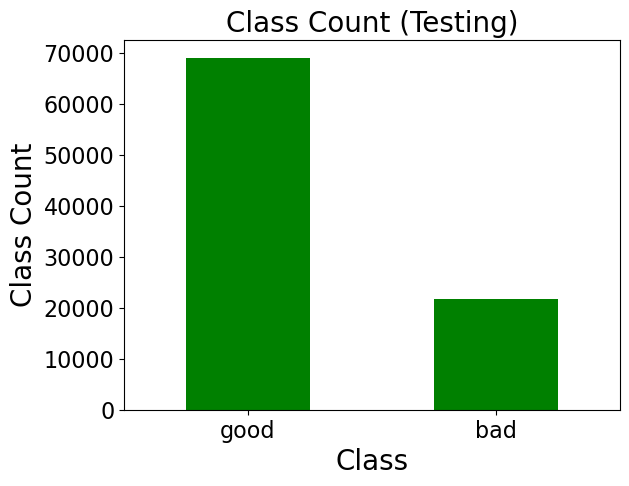

In [ ]:
# Print counts of each class
print("- Counting Splits -")
print("Training Samples:", len(train_df))
print("Testing Samples:", len(test_df))

# Graph counts of each class, for both training and testing
count_train_classes = pd.value_counts(train_df['Class'])
count_train_classes.plot(kind='bar', fontsize=16)
plt.title("Class Count (Training)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

count_test_classes = pd.value_counts(test_df['Class'])
count_test_classes.plot(kind='bar', fontsize=16, colormap='ocean')
plt.title("Class Count (Testing)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

The Classify the Urls For The Good are Bad Urls

## Tokenization

Create our tokenizer by splitting URLs into their domains, subdomains, directories, files, and extensions.

In [ ]:
def tokenizer(url):
  """Separates feature words from the raw data
  Keyword arguments:
    url ---- The full URL
    
  :Returns -- The tokenized words; returned as a list
  """
  
    
  tokens = re.split('[/-]', url)
  
  for i in tokens:
   
    if i.find(".") >= 0:
      dot_split = i.split('.')
      
     
      if "com" in dot_split:
        dot_split.remove("com")
      if "www" in dot_split:
        dot_split.remove("www")
      
      tokens += dot_split
      
  return tokens
    

###  Tokenize a URL
Print the full URL, test_url
Print the results of tokenizer(test_url)

In [ ]:
print("\n- Full URL -\n")
print(test_url)
print("\n- Tokenized Output -\n")
tokenized_url = tokenizer(test_url)
print(tokenized_url)



- Full URL -

ussoccer.com/News/Federation-Services/2009/06/University-Of-Miami-President-Donna-E-Shalala-Joins-Team-To-Bring-FIFA-World-Cup-To-United-States-In.aspx

- Tokenized Output -

['ussoccer.com', 'News', 'Federation', 'Services', '2009', '06', 'University', 'Of', 'Miami', 'President', 'Donna', 'E', 'Shalala', 'Joins', 'Team', 'To', 'Bring', 'FIFA', 'World', 'Cup', 'To', 'United', 'States', 'In.aspx', 'ussoccer', 'In', 'aspx']


Vectorize the Data

Now that the training data has been loaded, we'll train the vectorizers to turn our features into numbers.

- Train the vectorizers

1. Create the count vectorizer **cVec** using the **CountVectorizer** function
2. Configure *cVec* to use the *tokenizer* function from earlier
3. Perform **fit_transform** on *cVec* to train the vectorizer with the *training URLs*\
a. Save the result as **count_X**


4. Create the TF-IDF vectorizer **tVec** using the **TfidfVectorizer** function
5. Configure *tVec* to use the *tokenizer* function from earlier
6. Perform **fit_transform** on *tVec* to train the vectorizer with the *training URLs*\
a. Save the result as **tfidf_X** 

In [ ]:
print("- Training Count Vectorizer -")
cVec = CountVectorizer(tokenizer=tokenizer)
count_X = cVec.fit_transform(train_df['URLs'])

print("- Training TF-IDF Vectorizer -")
tVec = TfidfVectorizer(tokenizer=tokenizer)
tfidf_X = tVec.fit_transform(train_df['URLs'])

- Training Count Vectorizer -
- Training TF-IDF Vectorizer -


# Count the test URL tokens
1. Print the count of each *token* from **test_url**

In [ ]:
for token in list(dict.fromkeys(tokenized_url)):
    print("{} - {}".format(tokenized_url.count(token), token))

1 - ussoccer.com
1 - News
1 - Federation
1 - Services
1 - 2009
1 - 06
1 - University
1 - Of
1 - Miami
1 - President
1 - Donna
1 - E
1 - Shalala
1 - Joins
1 - Team
2 - To
1 - Bring
1 - FIFA
1 - World
1 - Cup
1 - United
1 - States
1 - In.aspx
1 - ussoccer
1 - In
1 - aspx


# View the test URL vectorizers
1. Create a new **CountVectorizer** and **TfidfVectorizer** for demonstration
2. Train the new vectorizers on **test_url** using **fit_transform**
3. Print the results of each *transform*

In [ ]:
print("\n- Count Vectorizer (Test URL) -\n")
exvec = CountVectorizer(tokenizer=tokenizer)
exx = exvec.fit_transform([test_url])
print(exx)

print()
print("=" * 50)
print()



print("\n- TFIDF Vectorizer (Test URL) -\n")
exvec = TfidfVectorizer(tokenizer=tokenizer)
exx = exvec.fit_transform([test_url])
print(exx)



- Count Vectorizer (Test URL) -

  (0, 24)	1
  (0, 13)	1
  (0, 7)	1
  (0, 16)	1
  (0, 1)	1
  (0, 0)	1
  (0, 22)	1
  (0, 14)	1
  (0, 12)	1
  (0, 15)	1
  (0, 5)	1
  (0, 6)	1
  (0, 17)	1
  (0, 11)	1
  (0, 19)	1
  (0, 20)	2
  (0, 3)	1
  (0, 8)	1
  (0, 25)	1
  (0, 4)	1
  (0, 21)	1
  (0, 18)	1
  (0, 10)	1
  (0, 23)	1
  (0, 9)	1
  (0, 2)	1



- TFIDF Vectorizer (Test URL) -

  (0, 2)	0.18569533817705186
  (0, 9)	0.18569533817705186
  (0, 23)	0.18569533817705186
  (0, 10)	0.18569533817705186
  (0, 18)	0.18569533817705186
  (0, 21)	0.18569533817705186
  (0, 4)	0.18569533817705186
  (0, 25)	0.18569533817705186
  (0, 8)	0.18569533817705186
  (0, 3)	0.18569533817705186
  (0, 20)	0.3713906763541037
  (0, 19)	0.18569533817705186
  (0, 11)	0.18569533817705186
  (0, 17)	0.18569533817705186
  (0, 6)	0.18569533817705186
  (0, 5)	0.18569533817705186
  (0, 15)	0.18569533817705186
  (0, 12)	0.18569533817705186
  (0, 14)	0.18569533817705186
  (0, 22)	0.18569533817705186
  (0, 0)	0.18569533817705186
  (0, 1

# Test and Evaluate the Models
OK, we have our training data loaded and our testing data loaded. Now it's time to train and evaluate our models.

But first, we're going to define a helper function to display our evaluation reports.

# Vectorize the testing data
1. Use **cVec** to *transform* **test_df['URLs']**\
a. Save the result as **test_count_X**

2. Use **tVec** to *transform* **test_df['URLs']**\
a. Save the result as **test_tfidf_X**

In [ ]:
print("- Count Vectorizer -")
test_count_X = cVec.transform(test_df['URLs'])

print("- TFIDF Vectorizer -")
test_tfidf_X = tVec.transform(test_df['URLs'])


- Count Vectorizer -
- TFIDF Vectorizer -


In [ ]:
def generate_report(cmatrix, score, creport):
  """Generates and displays graphical reports
  Keyword arguments:
    cmatrix - Confusion matrix generated by the model
    score --- Score generated by the model
    creport - Classification Report generated by the model
    
  :Returns -- N/A
  """
  
  cmatrix = cmatrix.T
  
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix, 
              annot=True, 
              fmt="d", 
              linewidths=.5, 
              square = True, 
              cmap = 'Blues', 
              annot_kws={"size": 16}, 
              xticklabels=['bad', 'good'],
              yticklabels=['bad', 'good'])

  plt.xticks(rotation='horizontal', fontsize=16)
  plt.yticks(rotation='horizontal', fontsize=16)
  plt.xlabel('Actual Label', size=20);
  plt.ylabel('Predicted Label', size=20);

  title = 'Accuracy Score: {0:.4f}'.format(score)
  plt.title(title, size = 20);


  print(creport)
  plt.show()

# Train and evaluate the MNB-TFIDF model
1. Create **mnb_tfidf** as a **MultinomialNB()** constructor
2. Use **fit** to train *mnb_tfidf* on the training data (*tfidf_X*) and training labels (*labels*)
3. Evaluate the model with the testing data (*test_tfidf_X*) and testing labels (*test_labels*):\
a. Use the **score** function in *mnb_tfidf* to calculate model accuracy; save the results as **score_mnb_tfidf**\
b. Use the **predict** function in *mnb_tfidf* to generate model predictions; save the results as **predictions_mnb_tfidf**\
c. Generate the confusion matrix with **confusion_matrix**, using the predictons and labels; save the results as **cmatrix_mnb_tfidf**\
d. Generate the classification report with **classification_report**, using the predictions and labels; save the results as **creport_mnb_tfidf**


****** Model Built ******

              precision    recall  f1-score   support

         bad       0.98      0.93      0.95     21675
        good       0.98      0.99      0.99     69012

    accuracy                           0.98     90687
   macro avg       0.98      0.96      0.97     90687
weighted avg       0.98      0.98      0.98     90687



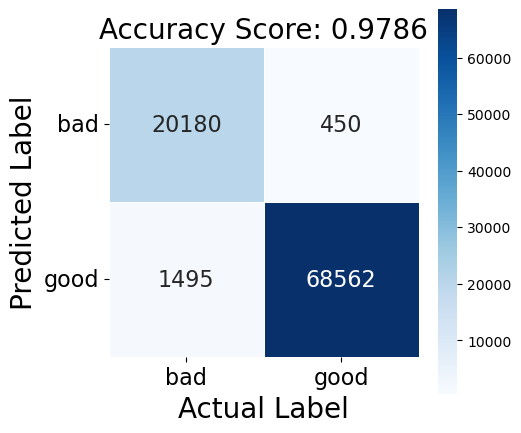

In [ ]:
mnb_tfidf = MultinomialNB(alpha = .1)
mnb_tfidf.fit(tfidf_X, labels)

score_mnb_tfidf = mnb_tfidf.score(test_tfidf_X, test_labels)
predictions_mnb_tfidf = mnb_tfidf.predict(test_tfidf_X)
cmatrix_mnb_tfidf = confusion_matrix(test_labels, predictions_mnb_tfidf)
creport_mnb_tfidf = classification_report(test_labels, predictions_mnb_tfidf)

print("\n****** Model Built ******\n")
generate_report(cmatrix_mnb_tfidf, score_mnb_tfidf, creport_mnb_tfidf)

Train and evaluate the MNB-Count model



### Model Built ###

              precision    recall  f1-score   support

         bad       0.96      0.94      0.95     21675
        good       0.98      0.99      0.98     69012

    accuracy                           0.98     90687
   macro avg       0.97      0.96      0.97     90687
weighted avg       0.98      0.98      0.98     90687



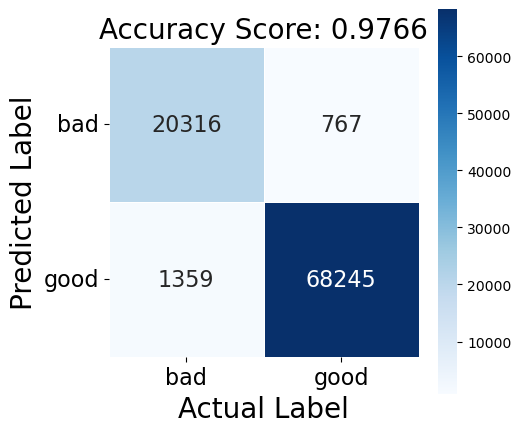

In [ ]:
mnb_count = MultinomialNB(alpha = .1)
mnb_count.fit(count_X, labels)
score_mnb_count = mnb_count.score(test_count_X, test_labels)
predictions_mnb_count = mnb_count.predict(test_count_X)
cmatrix_mnb_count = confusion_matrix(test_labels, predictions_mnb_count)
creport_mnb_count = classification_report(test_labels, predictions_mnb_count)
print("\n### Model Built ###\n")
generate_report(cmatrix_mnb_count, score_mnb_count, creport_mnb_count)

Train and evaluate the LGS-TFIDF model


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



### Model Built ###

              precision    recall  f1-score   support

         bad       0.96      0.87      0.91     21675
        good       0.96      0.99      0.97     69012

    accuracy                           0.96     90687
   macro avg       0.96      0.93      0.94     90687
weighted avg       0.96      0.96      0.96     90687



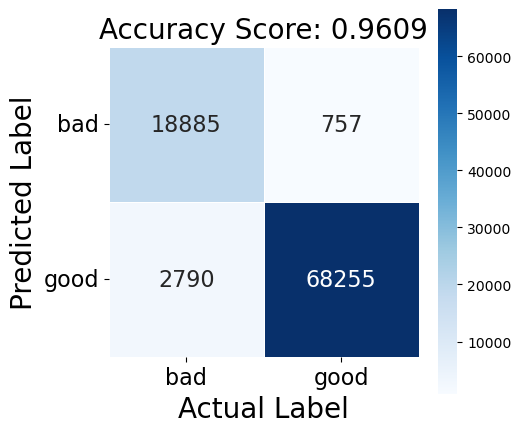

In [ ]:

lgs_tfidf = LogisticRegression(solver='lbfgs')
lgs_tfidf.fit(tfidf_X, labels)

score_lgs_tfidf = lgs_tfidf.score(test_tfidf_X, test_labels)
predictions_lgs_tfidf = lgs_tfidf.predict(test_tfidf_X)
cmatrix_lgs_tfidf = confusion_matrix(test_labels, predictions_lgs_tfidf)
creport_lgs_tfidf = classification_report(test_labels, predictions_lgs_tfidf)

print("\n### Model Built ###\n")
generate_report(cmatrix_lgs_tfidf, score_lgs_tfidf, creport_lgs_tfidf)

Train and evaluate the LGS-Count model


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



### Model Built ###

              precision    recall  f1-score   support

         bad       0.93      0.79      0.86     21675
        good       0.94      0.98      0.96     69012

    accuracy                           0.94     90687
   macro avg       0.93      0.89      0.91     90687
weighted avg       0.94      0.94      0.93     90687



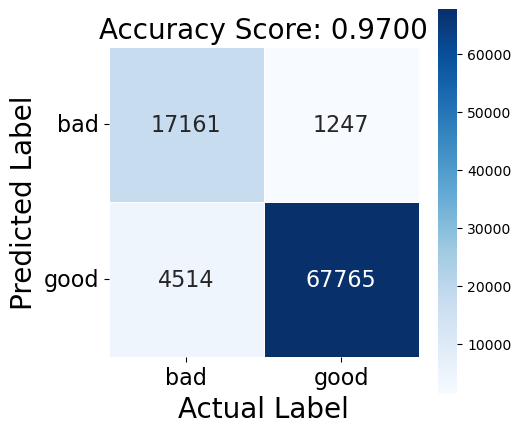

In [ ]:
# Logistic Regression with Count Vectorizer
lgs_count = LogisticRegression(solver='lbfgs')
lgs_count.fit(count_X, labels)

# Test the mode (score, predictions, confusion matrix, classification report)

score_lgs_count = lgs_count.score(test_count_X, test_labels)
predictions_lgs_count = lgs_tfidf.predict(test_count_X)
cmatrix_lgs_count = confusion_matrix(test_labels, predictions_lgs_count)
creport_lgs_count = classification_report(test_labels, predictions_lgs_count)

# (Keep the following lines)
print("\n### Model Built ###\n")
generate_report(cmatrix_lgs_count, score_lgs_count, creport_lgs_count)

In [ ]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

Finely The Model To Deploy The Flack Api To Deploy your Model

Thankyou

**By**

**Manickavasagam P**

**Data Analyst**

****